In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from scipy import stats

In [96]:
customer = pd.read_excel('D:/DS Training Videos/ML algo script/4.Clustering/customer segmentation/StoreSalesData.xlsx',sheet_name='Data')

In [97]:
customer.head()

,Store_ID,Date,Visitors,RegCustomers,PurchasingCustomers,RegdPurchasingCustomers,Repeatcustomers,Sales,ValidTransactions,PacketSize
0,1,2014-01-02,1113,844,618,457,137,506838,1038,488.283237
1,1,2014-01-03,1147,762,552,442,212,389670,972,400.895062
2,1,2014-01-04,1205,925,660,634,361,331072,1294,255.851623
3,1,2014-01-06,1176,937,649,519,182,253954,848,299.474057
4,1,2014-01-07,1265,894,607,437,188,648063,689,940.584906


In [98]:
X = customer.groupby('Store_ID')[['RegCustomers','PurchasingCustomers','RegdPurchasingCustomers','Repeatcustomers','Sales','ValidTransactions','PacketSize']].sum()

In [99]:
X.head()

,RegCustomers,PurchasingCustomers,RegdPurchasingCustomers,Repeatcustomers,Sales,ValidTransactions,PacketSize
Store_ID,,,,,,,
1,230244,168764,143545,64992,107852058,252000,134367.271846
2,240393,178057,150007,68113,116531186,268088,135625.372301
3,284861,224897,191834,84378,155842930,333564,144453.597940
4,465764,405758,342068,156956,217611730,601796,113120.754577
5,223549,161960,136782,63084,107499632,245194,134098.652043


In [100]:
z = np.abs(stats.zscore(X))

In [101]:
X = X[(z < 3).all(axis=1)]

In [102]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RegCustomers               7.110800e+04
PurchasingCustomers        6.982000e+04
RegdPurchasingCustomers    5.992100e+04
Repeatcustomers            2.604800e+04
Sales                      6.209906e+07
ValidTransactions          1.084940e+05
PacketSize                 4.730372e+04
dtype: float64


In [103]:
X = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]

In [104]:
X.shape

(81, 7)

In [105]:
X.columns

Index(['RegCustomers', 'PurchasingCustomers', 'RegdPurchasingCustomers',
       'Repeatcustomers', 'Sales', 'ValidTransactions', 'PacketSize'],
      dtype='object')

In [106]:
X.ValidTransactions.sort_values(ascending=True).head()

Store_ID
81    126587
89    134154
46    147651
83    156147
50    160845
Name: ValidTransactions, dtype: int64

Text(0,0.5,'Repeated customers')

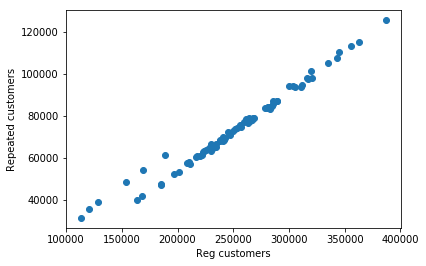

In [107]:
plt.scatter(X.RegCustomers,X.Repeatcustomers)
plt.xlabel('Reg customers')
plt.ylabel('Repeated customers')

In [108]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [109]:
X=pd.DataFrame(X,columns=['RegCustomers','PurchasingCustomers','RegdPurchasingCustomers','Repeatcustomers','Sales','ValidTransactions','PacketSize'])

In [110]:
X.head()

,RegCustomers,PurchasingCustomers,RegdPurchasingCustomers,Repeatcustomers,Sales,ValidTransactions,PacketSize
0,-0.395226,-0.493226,-0.489301,-0.471284,-0.909227,-0.504333,-0.444667
1,-0.203820,-0.303697,-0.334748,-0.303953,-0.681483,-0.284399,-0.406522
2,0.634830,0.651596,0.665637,0.568090,0.350077,0.610699,-0.138855
3,-0.521491,-0.631993,-0.651053,-0.573581,-0.918475,-0.597375,-0.452812
4,-0.246159,-0.285077,-0.297365,-0.294785,-0.688651,-0.232424,-0.441678


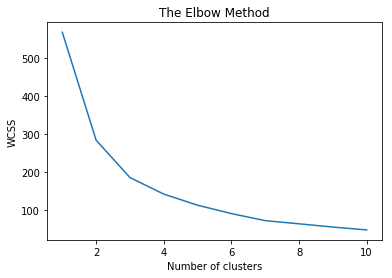

In [111]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [112]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [113]:
X.head()

,RegCustomers,PurchasingCustomers,RegdPurchasingCustomers,Repeatcustomers,Sales,ValidTransactions,PacketSize
0,-0.395226,-0.493226,-0.489301,-0.471284,-0.909227,-0.504333,-0.444667
1,-0.203820,-0.303697,-0.334748,-0.303953,-0.681483,-0.284399,-0.406522
2,0.634830,0.651596,0.665637,0.568090,0.350077,0.610699,-0.138855
3,-0.521491,-0.631993,-0.651053,-0.573581,-0.918475,-0.597375,-0.452812
4,-0.246159,-0.285077,-0.297365,-0.294785,-0.688651,-0.232424,-0.441678


In [114]:
no_of_clusters = [2, 3, 4, 5, 6]
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.41367419934502847
For no of clusters = 3  The average silhouette_score is : 0.4013226292308516
For no of clusters = 4  The average silhouette_score is : 0.3523481024399492
For no of clusters = 5  The average silhouette_score is : 0.36141328665180034
For no of clusters = 6  The average silhouette_score is : 0.3751025074097193


In [115]:
X['cluster']=y_kmeans
X.cluster.value_counts()

1    45
0    22
2    14
Name: cluster, dtype: int64

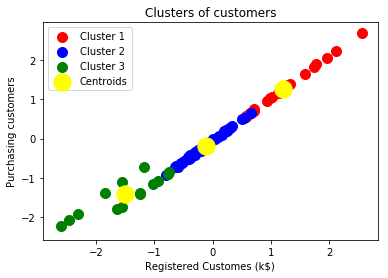

In [116]:
plt.scatter(X[y_kmeans == 0].RegCustomers, X[y_kmeans == 0].PurchasingCustomers,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].RegCustomers, X[y_kmeans == 1].PurchasingCustomers,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].RegCustomers, X[y_kmeans == 2].PurchasingCustomers, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].PurchasingCustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].PurchasingCustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Registered Customes (k$)')
plt.ylabel('Purchasing customers')
plt.legend()
plt.show()

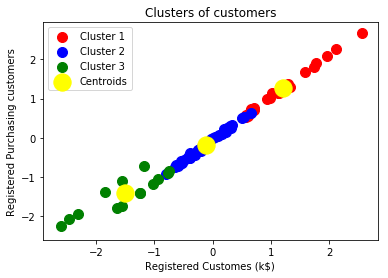

In [119]:
plt.scatter(X[y_kmeans == 0].RegCustomers, X[y_kmeans == 0].RegdPurchasingCustomers,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].RegCustomers, X[y_kmeans == 1].RegdPurchasingCustomers,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].RegCustomers, X[y_kmeans == 2].RegdPurchasingCustomers, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].RegdPurchasingCustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].RegdPurchasingCustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Registered Customes (k$)')
plt.ylabel('Registered Purchasing customers')
plt.legend()
plt.show()

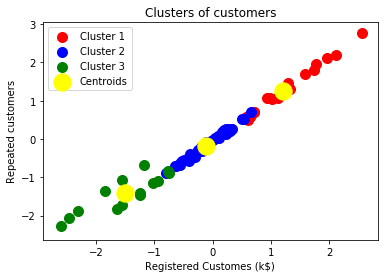

In [144]:
plt.scatter(X[y_kmeans == 0].RegCustomers, X[y_kmeans == 0].Repeatcustomers,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].RegCustomers, X[y_kmeans == 1].Repeatcustomers,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].RegCustomers, X[y_kmeans == 2].Repeatcustomers, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Registered Customes (k$)')
plt.ylabel('Repeated customers')
plt.legend()
plt.show()

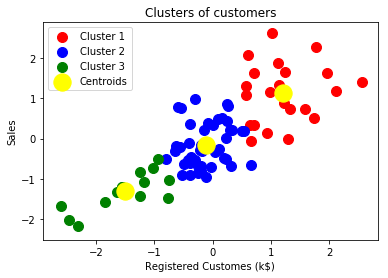

In [145]:
plt.scatter(X[y_kmeans == 0].RegCustomers, X[y_kmeans == 0].Sales,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].RegCustomers, X[y_kmeans == 1].Sales,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].RegCustomers, X[y_kmeans == 2].Sales, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 4], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Registered Customes (k$)')
plt.ylabel('Sales')
plt.legend()
plt.show()

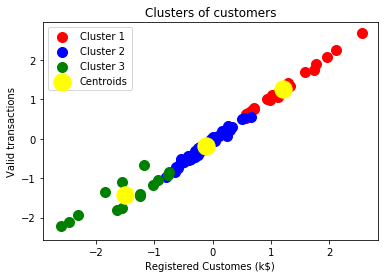

In [146]:
plt.scatter(X[y_kmeans == 0].RegCustomers, X[y_kmeans == 0].ValidTransactions,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].RegCustomers, X[y_kmeans == 1].ValidTransactions,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].RegCustomers, X[y_kmeans == 2].ValidTransactions, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 5], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Registered Customes (k$)')
plt.ylabel('Valid transactions')
plt.legend()
plt.show()

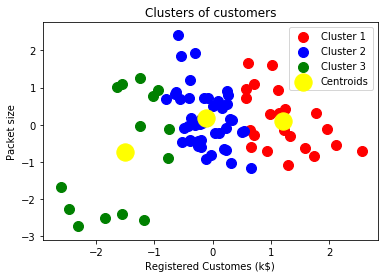

In [147]:
plt.scatter(X[y_kmeans == 0].RegCustomers, X[y_kmeans == 0].PacketSize,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].RegCustomers, X[y_kmeans == 1].PacketSize,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].RegCustomers, X[y_kmeans == 2].PacketSize, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 6], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Registered Customes (k$)')
plt.ylabel('Packet size')
plt.legend()
plt.show()

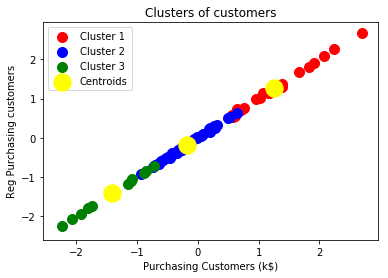

In [148]:
plt.scatter(X[y_kmeans == 0].PurchasingCustomers, X[y_kmeans == 0].RegdPurchasingCustomers,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].PurchasingCustomers, X[y_kmeans == 1].RegdPurchasingCustomers,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].PurchasingCustomers, X[y_kmeans == 2].RegdPurchasingCustomers, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Purchasing Customers (k$)')
plt.ylabel('Reg Purchasing customers')
plt.legend()
plt.show()

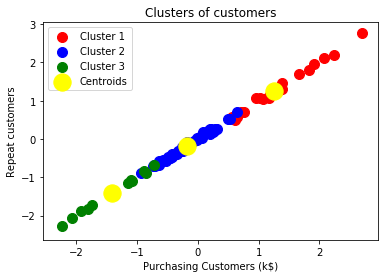

In [149]:
plt.scatter(X[y_kmeans == 0].PurchasingCustomers, X[y_kmeans == 0].Repeatcustomers,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].PurchasingCustomers, X[y_kmeans == 1].Repeatcustomers,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].PurchasingCustomers, X[y_kmeans == 2].Repeatcustomers, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Purchasing Customers (k$)')
plt.ylabel('Repeat customers')
plt.legend()
plt.show()

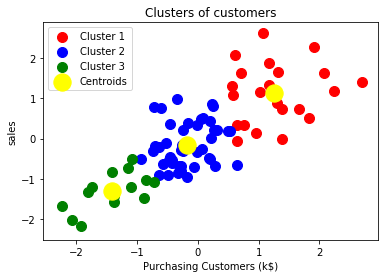

In [150]:
plt.scatter(X[y_kmeans == 0].PurchasingCustomers, X[y_kmeans == 0].Sales,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].PurchasingCustomers, X[y_kmeans == 1].Sales,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].PurchasingCustomers, X[y_kmeans == 2].Sales, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 4], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Purchasing Customers (k$)')
plt.ylabel('sales')
plt.legend()
plt.show()

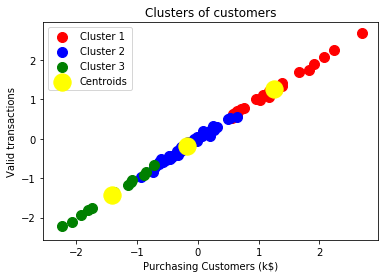

In [151]:
plt.scatter(X[y_kmeans == 0].PurchasingCustomers, X[y_kmeans == 0].ValidTransactions,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].PurchasingCustomers, X[y_kmeans == 1].ValidTransactions,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].PurchasingCustomers, X[y_kmeans == 2].ValidTransactions, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 5], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Purchasing Customers (k$)')
plt.ylabel('Valid transactions')
plt.legend()
plt.show()

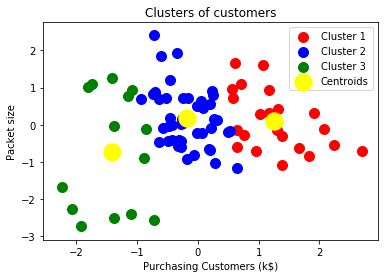

In [152]:
plt.scatter(X[y_kmeans == 0].PurchasingCustomers, X[y_kmeans == 0].PacketSize,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].PurchasingCustomers, X[y_kmeans == 1].PacketSize,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].PurchasingCustomers, X[y_kmeans == 2].PacketSize, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 6], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Purchasing Customers (k$)')
plt.ylabel('Packet size')
plt.legend()
plt.show()

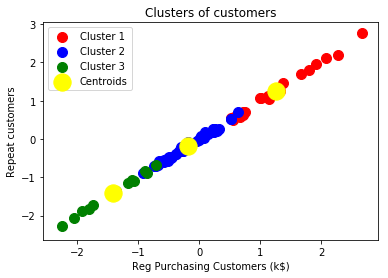

In [153]:
plt.scatter(X[y_kmeans == 0].RegdPurchasingCustomers, X[y_kmeans == 0].Repeatcustomers,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].RegdPurchasingCustomers, X[y_kmeans == 1].Repeatcustomers,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].RegdPurchasingCustomers, X[y_kmeans == 2].Repeatcustomers, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Reg Purchasing Customers (k$)')
plt.ylabel('Repeat customers')
plt.legend()
plt.show()

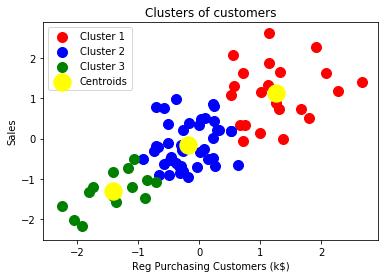

In [154]:
plt.scatter(X[y_kmeans == 0].RegdPurchasingCustomers, X[y_kmeans == 0].Sales,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].RegdPurchasingCustomers, X[y_kmeans == 1].Sales,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].RegdPurchasingCustomers, X[y_kmeans == 2].Sales, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 4], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Reg Purchasing Customers (k$)')
plt.ylabel('Sales')
plt.legend()
plt.show()

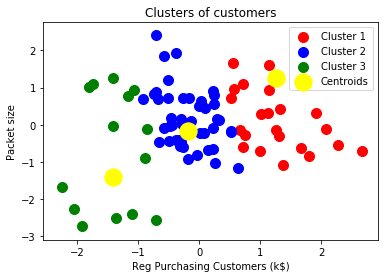

In [155]:
plt.scatter(X[y_kmeans == 0].RegdPurchasingCustomers, X[y_kmeans == 0].PacketSize,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].RegdPurchasingCustomers, X[y_kmeans == 1].PacketSize,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].RegdPurchasingCustomers, X[y_kmeans == 2].PacketSize, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 5], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Reg Purchasing Customers (k$)')
plt.ylabel('Packet size')
plt.legend()
plt.show()

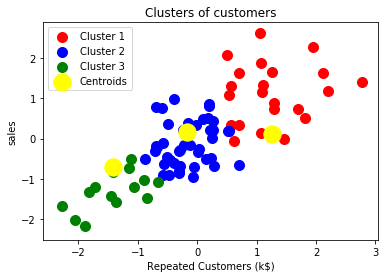

In [156]:
plt.scatter(X[y_kmeans == 0].Repeatcustomers, X[y_kmeans == 0].Sales,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].Repeatcustomers, X[y_kmeans == 1].Sales,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].Repeatcustomers, X[y_kmeans == 2].Sales, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 6], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Repeated Customers (k$)')
plt.ylabel('sales')
plt.legend()
plt.show()

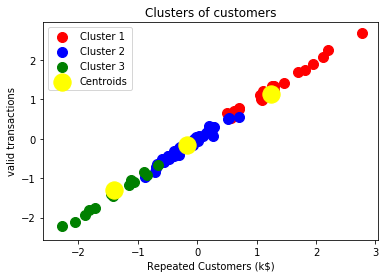

In [157]:
plt.scatter(X[y_kmeans == 0].Repeatcustomers, X[y_kmeans == 0].ValidTransactions,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].Repeatcustomers, X[y_kmeans == 1].ValidTransactions,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].Repeatcustomers, X[y_kmeans == 2].ValidTransactions, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 4], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Repeated Customers (k$)')
plt.ylabel('valid transactions')
plt.legend()
plt.show()

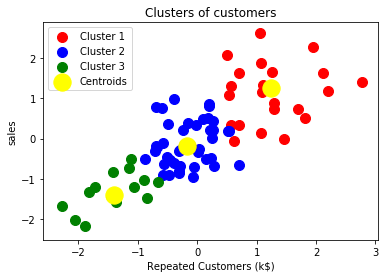

In [158]:
plt.scatter(X[y_kmeans == 0].Repeatcustomers, X[y_kmeans == 0].Sales,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].Repeatcustomers, X[y_kmeans == 1].Sales,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].Repeatcustomers, X[y_kmeans == 2].Sales, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 5], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Repeated Customers (k$)')
plt.ylabel('sales')
plt.legend()
plt.show()

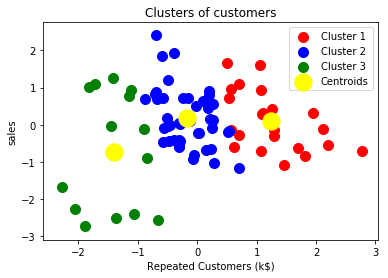

In [159]:
plt.scatter(X[y_kmeans == 0].Repeatcustomers, X[y_kmeans == 0].PacketSize,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].Repeatcustomers, X[y_kmeans == 1].PacketSize,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].Repeatcustomers, X[y_kmeans == 2].PacketSize, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 6], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Repeated Customers (k$)')
plt.ylabel('sales')
plt.legend()
plt.show()

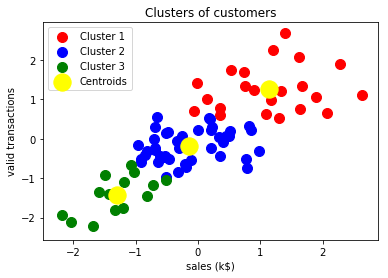

In [160]:
plt.scatter(X[y_kmeans == 0].Sales, X[y_kmeans == 0].ValidTransactions,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].Sales, X[y_kmeans == 1].ValidTransactions,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].Sales, X[y_kmeans == 2].ValidTransactions, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('sales (k$)')
plt.ylabel('valid transactions')
plt.legend()
plt.show()

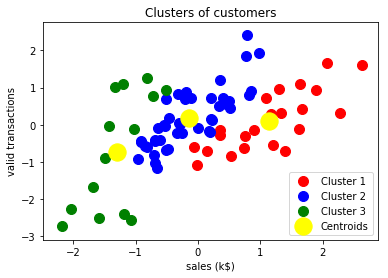

In [161]:
plt.scatter(X[y_kmeans == 0].Sales, X[y_kmeans == 0].PacketSize,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].Sales, X[y_kmeans == 1].PacketSize,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].Sales, X[y_kmeans == 2].PacketSize, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 6], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('sales (k$)')
plt.ylabel('valid transactions')
plt.legend()
plt.show()

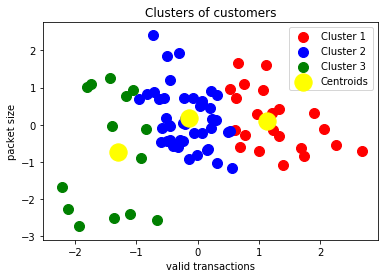

In [162]:
plt.scatter(X[y_kmeans == 0].ValidTransactions, X[y_kmeans == 0].PacketSize,s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].ValidTransactions, X[y_kmeans == 1].PacketSize,s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].ValidTransactions, X[y_kmeans == 2].PacketSize, s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3].RegCustomers, X[y_kmeans == 3].Repeatcustomers, s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4].RegCustomers, X[y_kmeans == 4].Repeatcustomers, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 6], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.ylabel('packet size')
plt.xlabel('valid transactions')
plt.legend()
plt.show()